In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
models = [f[:-4] for f in os.listdir('../stats/') if f.endswith(".npy")]
#models = ['test']
num_steps = 500
colors = ['#204594', '#95B333', '#FD9D59', '#F585A5', '#CDB460', '#3AB5D4', '#B72220', '#FEE30E', '#319848', '#5f1250', '#e7221a']

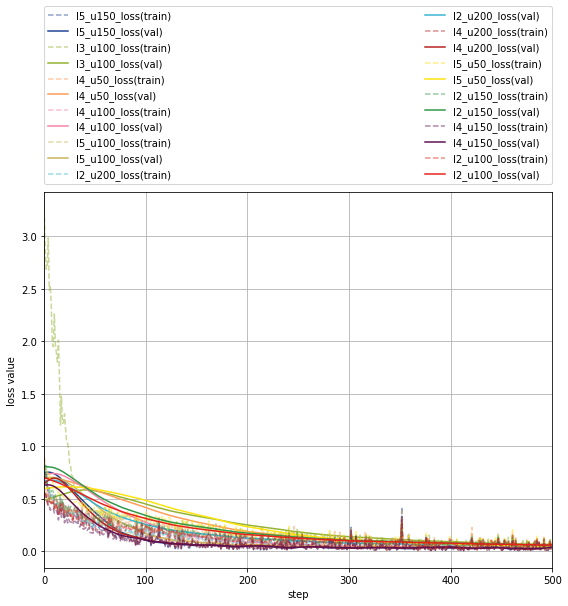

In [3]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
for modelname, colorname in zip(models, colors):
    stats = np.load('../stats/'+modelname+".npy")
    ax.plot(range(num_steps), stats[:,0], label=modelname+"_loss(train)", color=colorname, alpha=0.5, linestyle='--')
    ax.plot(range(num_steps), stats[:,3], label=modelname+"_loss(val)", color=colorname)
lgd = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0)
ax.set_xlim(0, num_steps)
ax.set_xlabel("step")
ax.set_ylabel("loss value")
ax.grid()
fig.tight_layout()
fig.savefig("loss.pdf", bbox_extra_artists=(fig,), bbox_inches='tight')

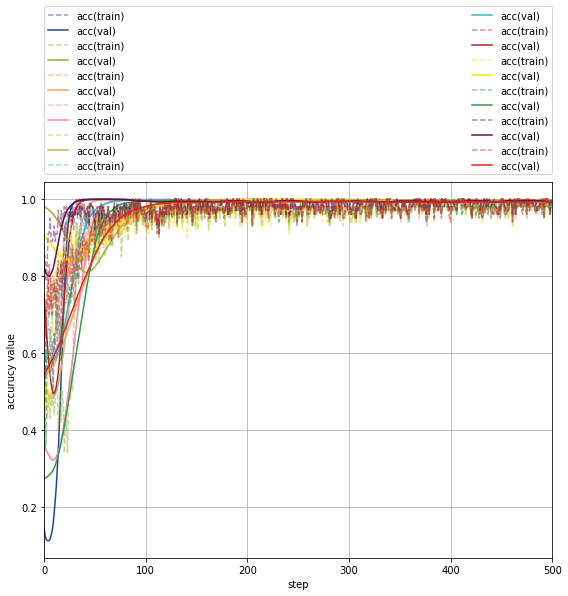

In [6]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
for modelname, colorname in zip(models, colors):
    stats = np.load('../stats/'+modelname+".npy")
    ax.plot(range(num_steps), stats[:,1], label="acc(train)", color=colorname, alpha=0.5, linestyle='--')
    ax.plot(range(num_steps), stats[:,4], label="acc(val)", color=colorname)
lgd = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0)
ax.set_xlim(0, num_steps)
ax.set_xlabel("step")
ax.set_ylabel("accurucy value")
ax.grid()
fig.tight_layout()
fig.savefig("acc.pdf", bbox_extra_artists=(fig,), bbox_inches='tight')

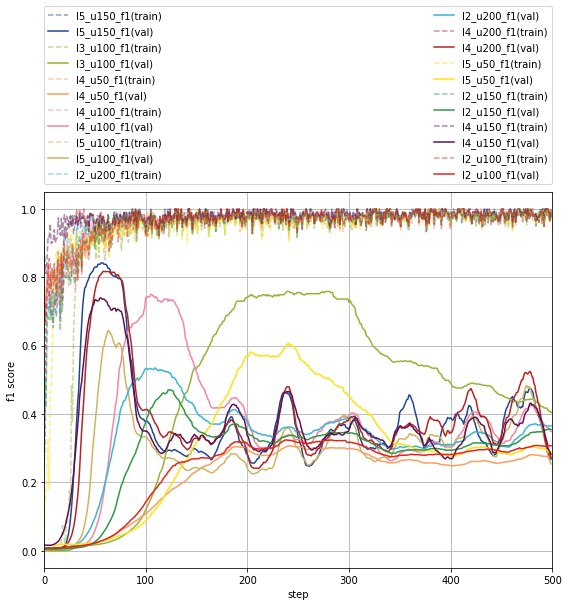

In [5]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
for modelname, colorname in zip(models, colors):
    stats = np.load('../stats/'+modelname+".npy")
    ax.plot(range(num_steps), stats[:,2], label=modelname+"_f1(train)", color=colorname, alpha=0.5, linestyle='--')
    ax.plot(range(num_steps), stats[:,5], label=modelname+"_f1(val)", color=colorname)
lgd = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0)
ax.set_xlim(0, num_steps)
ax.set_xlabel("step")
ax.set_ylabel("f1 score")
ax.grid()
fig.tight_layout()
fig.savefig("f1.pdf", bbox_extra_artists=(fig,), bbox_inches='tight')

In [ ]:
maxf1 = {}
for modelname in models:
    stats = np.load('../stats/'+modelname+".npy")
    maxf1.update({modelname:stats[:,5].max()})

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.bar(range(len(maxf1)), list(maxf1.values()), align='center')
ax.set_xticks(range(len(maxf1)))
ax.set_xticklabels(list(maxf1.keys()))
ax.set_ylabel("max f1 score")
ax.set_xlabel("model")
fig.savefig("f1_barchart.pdf")